In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

1.10.0


# Download the IMDB dataset
---
> Rather than using an embedding as in the previous notebook, here we will **multi-hot encode the sentences**. This model will quickly **overfit to the training set**. It will be used to demonstrate when overfitting occurs, and how to fight it.

> **Multi-hot-encoding** our lists means turning them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all- zeros except for indices 3 and 5, which would be ones.

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

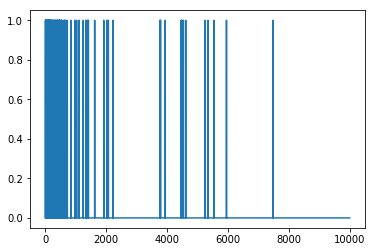

In [4]:
plt.plot(train_data[0])

# Demenstrate overfitting
---
## 1 Create a baseline model

In [8]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
baseline_history = baseline_model.fit(train_data, train_labels, 
                                      epochs=20, batch_size=512, verbose=2,
                                      validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4807 - acc: 0.8171 - binary_crossentropy: 0.4807 - val_loss: 0.3423 - val_acc: 0.8762 - val_binary_crossentropy: 0.3423
Epoch 2/20
 - 2s - loss: 0.2508 - acc: 0.9101 - binary_crossentropy: 0.2508 - val_loss: 0.2845 - val_acc: 0.8885 - val_binary_crossentropy: 0.2845
Epoch 3/20
 - 2s - loss: 0.1820 - acc: 0.9356 - binary_crossentropy: 0.1820 - val_loss: 0.2886 - val_acc: 0.8842 - val_binary_crossentropy: 0.2886
Epoch 4/20
 - 2s - loss: 0.1437 - acc: 0.9513 - binary_crossentropy: 0.1437 - val_loss: 0.3136 - val_acc: 0.8784 - val_binary_crossentropy: 0.3136
Epoch 5/20
 - 2s - loss: 0.1169 - acc: 0.9617 - binary_crossentropy: 0.1169 - val_loss: 0.3395 - val_acc: 0.8732 - val_binary_crossentropy: 0.3395
Epoch 6/20
 - 2s - loss: 0.0941 - acc: 0.9723 - binary_crossentropy: 0.0941 - val_loss: 0.3702 - val_acc: 0.8705 - val_binary_crossentropy: 0.3702
Epoch 7/20
 - 2s - loss: 0.0752 - acc: 0.9802 - binary_crossentropy:

## 2 Create a smaller model

In [12]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [14]:
smaller_history = smaller_model.fit(train_data, train_labels,
                                    epochs=20, batch_size=512, verbose=2,
                                    validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6272 - acc: 0.6482 - binary_crossentropy: 0.6272 - val_loss: 0.5493 - val_acc: 0.7975 - val_binary_crossentropy: 0.5493
Epoch 2/20
 - 2s - loss: 0.4412 - acc: 0.8751 - binary_crossentropy: 0.4412 - val_loss: 0.3888 - val_acc: 0.8739 - val_binary_crossentropy: 0.3888
Epoch 3/20
 - 2s - loss: 0.3080 - acc: 0.9066 - binary_crossentropy: 0.3080 - val_loss: 0.3198 - val_acc: 0.8845 - val_binary_crossentropy: 0.3198
Epoch 4/20
 - 2s - loss: 0.2457 - acc: 0.9212 - binary_crossentropy: 0.2457 - val_loss: 0.2947 - val_acc: 0.8868 - val_binary_crossentropy: 0.2947
Epoch 5/20
 - 2s - loss: 0.2098 - acc: 0.9308 - binary_crossentropy: 0.2098 - val_loss: 0.2858 - val_acc: 0.8866 - val_binary_crossentropy: 0.2858
Epoch 6/20
 - 2s - loss: 0.1848 - acc: 0.9384 - binary_crossentropy: 0.1848 - val_loss: 0.2819 - val_acc: 0.8880 - val_binary_crossentropy: 0.2819
Epoch 7/20
 - 2s - loss: 0.1655 - acc: 0.9460 - binary_crossentropy:

## 3 Create a bigger model

In [15]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                    epochs=20, batch_size=512, verbose=2,
                                    validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.3459 - acc: 0.8513 - binary_crossentropy: 0.3459 - val_loss: 0.2950 - val_acc: 0.8800 - val_binary_crossentropy: 0.2950
Epoch 2/20
 - 10s - loss: 0.1345 - acc: 0.9510 - binary_crossentropy: 0.1345 - val_loss: 0.3518 - val_acc: 0.8650 - val_binary_crossentropy: 0.3518
Epoch 3/20
 - 10s - loss: 0.0391 - acc: 0.9887 - binary_crossentropy: 0.0391 - val_loss: 0.4527 - val_acc: 0.8666 - val_binary_crossentropy: 0.4527
Epoch 4/20
 - 10s - loss: 0.0058 - acc: 0.9994 - binary_crossentropy: 0.0058 - val_loss: 0.6002 - val_acc: 0.8694 - val_binary_crossentropy: 0.6002
Epoch 5/20
 - 10s - loss: 7.6115e-04 - acc: 1.0000 - binary_crossentropy: 7.6115e-04 - val_loss: 0.6674 - val_acc: 0.8711 - val_binary_crossentropy: 0.6674
Epoch 6/20
 - 10s - loss: 1.9570e-04 - acc: 1.0000 - binary_crossentropy: 1.9570e-04 - val_loss: 0.7054 - val_acc: 0.8712 - val_binary_crossentropy: 0.7054
Epoch 7/20
 - 10s - loss: 1.2079e-04 - acc: 1.

## 4 Plot the training and validation loss

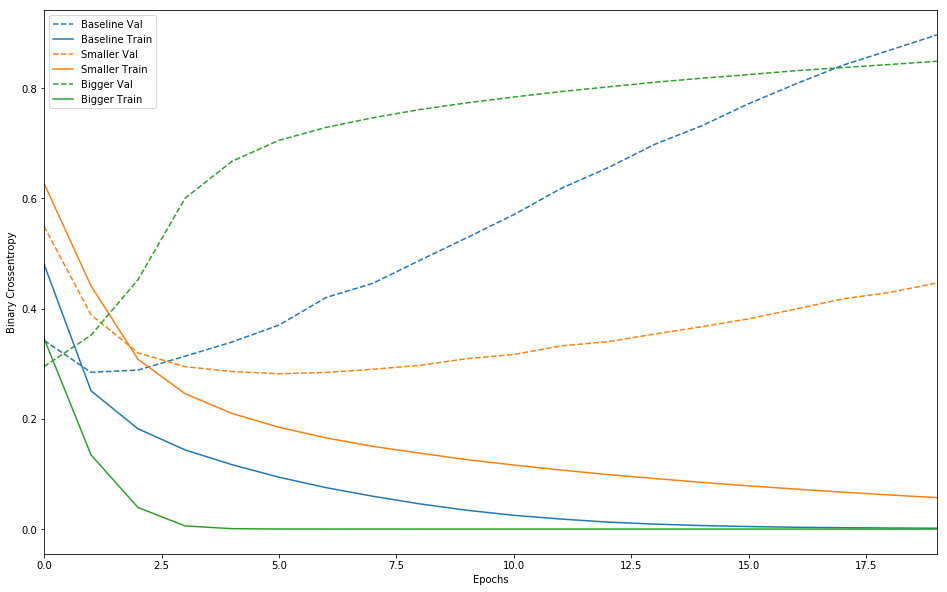

In [19]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        
        plt.xlim([0,max(history.epoch)])
        
        
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

# Strategies
---
## 1 Add weight regulartization
> A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network **by forcing its weights only to take small values, which makes the distribution of weight values more "regular". **

In [26]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20, batch_size=512, verbose=2,
                                validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5590 - acc: 0.7878 - binary_crossentropy: 0.5194 - val_loss: 0.4023 - val_acc: 0.8739 - val_binary_crossentropy: 0.3601
Epoch 2/20
 - 3s - loss: 0.3226 - acc: 0.9040 - binary_crossentropy: 0.2741 - val_loss: 0.3403 - val_acc: 0.8872 - val_binary_crossentropy: 0.2874
Epoch 3/20
 - 3s - loss: 0.2674 - acc: 0.9242 - binary_crossentropy: 0.2114 - val_loss: 0.3403 - val_acc: 0.8866 - val_binary_crossentropy: 0.2823
Epoch 4/20
 - 3s - loss: 0.2419 - acc: 0.9368 - binary_crossentropy: 0.1823 - val_loss: 0.3510 - val_acc: 0.8844 - val_binary_crossentropy: 0.2903
Epoch 5/20
 - 2s - loss: 0.2288 - acc: 0.9429 - binary_crossentropy: 0.1665 - val_loss: 0.3621 - val_acc: 0.8803 - val_binary_crossentropy: 0.2991
Epoch 6/20
 - 3s - loss: 0.2158 - acc: 0.9483 - binary_crossentropy: 0.1522 - val_loss: 0.3754 - val_acc: 0.8771 - val_binary_crossentropy: 0.3116
Epoch 7/20
 - 3s - loss: 0.2091 - acc: 0.9508 - binary_crossentropy:

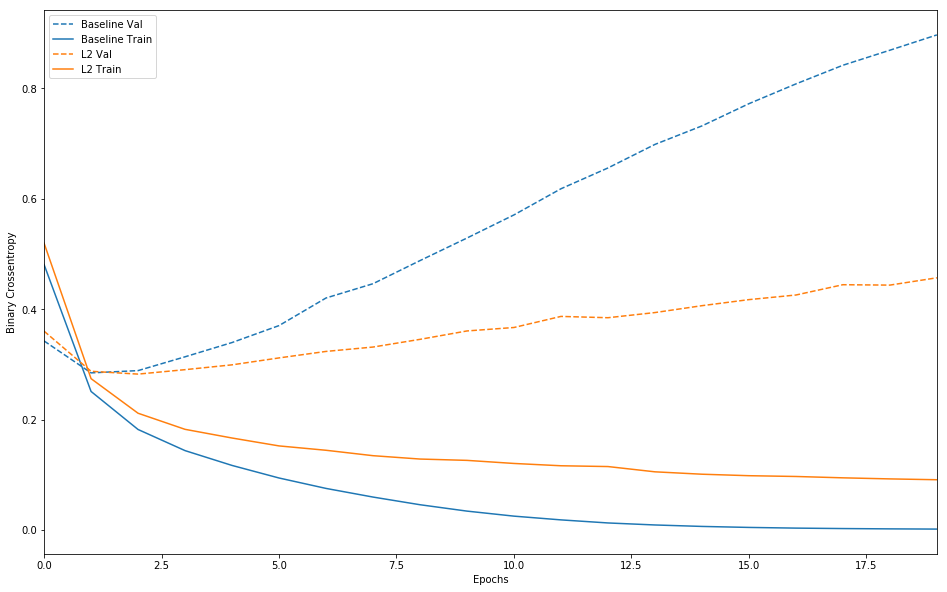

In [27]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## 2 Add dropout
> Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; **it is usually set between 0.2 and 0.5**. At test time, no units are dropped out, and instead **the layer's output values are scaled down by a factor equal to the dropout rate**, so as to balance for the fact that more units are active than at training time.

In [33]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20, batch_size=512, verbose=2,
                                  validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6208 - acc: 0.6402 - binary_crossentropy: 0.6208 - val_loss: 0.4622 - val_acc: 0.8562 - val_binary_crossentropy: 0.4622
Epoch 2/20
 - 3s - loss: 0.4485 - acc: 0.8018 - binary_crossentropy: 0.4485 - val_loss: 0.3280 - val_acc: 0.8788 - val_binary_crossentropy: 0.3280
Epoch 3/20
 - 3s - loss: 0.3447 - acc: 0.8682 - binary_crossentropy: 0.3447 - val_loss: 0.2835 - val_acc: 0.8866 - val_binary_crossentropy: 0.2835
Epoch 4/20
 - 3s - loss: 0.2832 - acc: 0.8963 - binary_crossentropy: 0.2832 - val_loss: 0.2737 - val_acc: 0.8891 - val_binary_crossentropy: 0.2737
Epoch 5/20
 - 2s - loss: 0.2391 - acc: 0.9180 - binary_crossentropy: 0.2391 - val_loss: 0.2764 - val_acc: 0.8891 - val_binary_crossentropy: 0.2764
Epoch 6/20
 - 2s - loss: 0.2092 - acc: 0.9311 - binary_crossentropy: 0.2092 - val_loss: 0.2903 - val_acc: 0.8842 - val_binary_crossentropy: 0.2903
Epoch 7/20
 - 3s - loss: 0.1845 - acc: 0.9388 - binary_crossentropy:

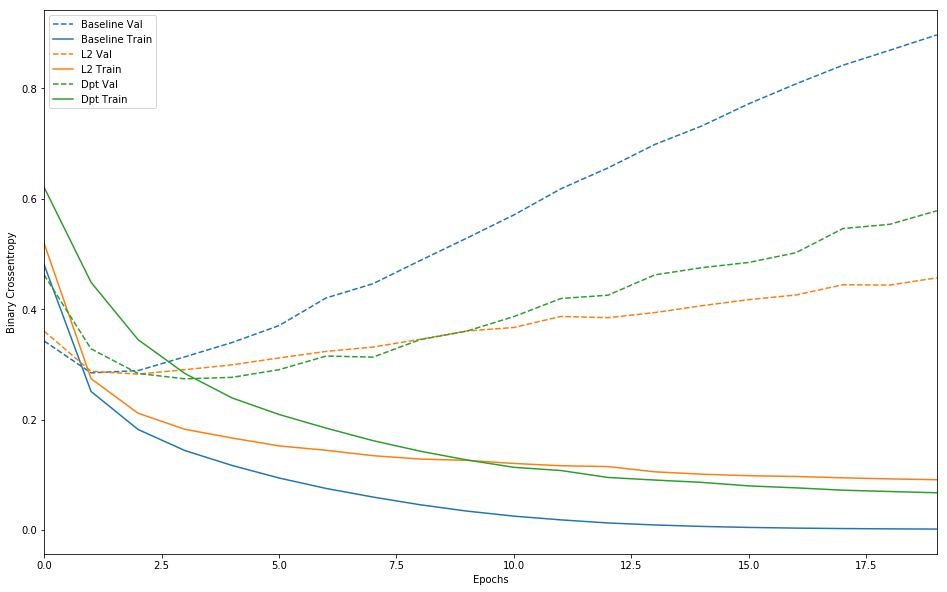

In [35]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history),
              ('dpt', dpt_model_history)])